In [6]:
from GG_mthesis import *
%matplotlib inline

#to muove files (not needed anymore, but useful code for future)
import shutil
import os
destination = "D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\all_files"
base = "D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D\\"
years = os.listdir("D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D")
months = os.listdir("D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D\\2000")
for i_year in years:
    for i_month in months:
        days = os.listdir(base+i_year+"\\"+i_month)
        for i_days in days:
            file_name = base+i_year+"\\"+i_month+"\\"+i_days
            shutil.move(file_name, destination)

In [7]:
df_bx = pd.read_csv('data/03_processed/SOCAT/data_gridded_distance', index_col=0)

In [8]:
df_bx

,rho,lon,lat,time,bx
0,1027.111325,-55.036099,-60.186746,2008-04-02 12:37:59.443732,2.420470e-08
1,1027.112993,-55.050653,-60.181407,2008-04-02 12:42:02.501421,1.592764e-08
2,1027.113652,-55.065062,-60.175973,2008-04-02 12:46:09.843105,6.301471e-09
3,1027.114112,-55.079467,-60.170537,2008-04-02 12:50:17.165555,4.391614e-09
4,1027.114587,-55.094108,-60.165262,2008-04-02 12:54:28.593366,4.531314e-09
...,...,...,...,...,...
101663,1026.866556,-57.843450,-55.485430,2018-11-06 09:04:17.604416,3.159840e-12
101664,1026.857450,-57.911272,-55.501976,2018-11-06 09:30:52.863982,3.509134e-12
101665,1026.857449,-57.926199,-55.505041,2018-11-06 09:36:37.674582,4.413789e-12
101666,1026.927593,-57.993488,-55.509729,2018-11-06 21:50:48.685594,1.225301e-07


In [9]:
np.percentile(df_bx['bx'], 95)

1.2180534084362013e-07

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


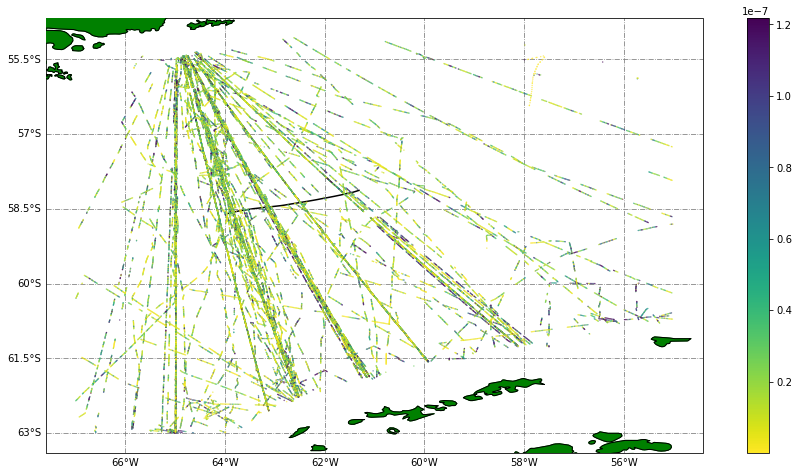

In [10]:
from GG_mthesis.d01_data.processing import rmap 
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=projection)
bx = ax.scatter(df_bx['lon'], df_bx['lat'], c=df_bx['bx'], s=0.1,transform=ccrs.PlateCarree(), zorder=500, cmap='viridis_r',
                vmax=np.percentile(df_bx['bx'], 95), vmin=np.percentile(df_bx['bx'], 5))
ax.coastlines(zorder=100)
ax.add_feature(cartopy.feature.LAND, color='green', zorder=50)
gl = ax.gridlines(draw_labels=True, linestyle='-.', color='gray')
gl.xlabels_top = False
gl.ylabels_right = False
fig.colorbar(bx)

fronts=rmap.load_fronts('data/01_raw/ACC_FRONTS/PARK/62985.nc')
fronts=rmap.sel_front_region(fronts, lon_min=-64, lon_max=-60, lat_min=-60, lat_max=-58.1)
s=4
#SAF = ax.plot(fronts.loc['SAF']['longitude'], fronts.loc['SAF']['latitude'],transform=ccrs.PlateCarree(), label='SAF_Park', color='purple')#, s=s)
PF = ax.plot(fronts.loc['PF']['longitude'], fronts.loc['PF']['latitude'], transform=ccrs.PlateCarree(), label='PF_Park', color='black')#, s=s)
#SACCF = ax.plot(fronts.loc['SACCF']['longitude'], fronts.loc['SACCF']['latitude'],transform=ccrs.PlateCarree(), label='SACCF_Park', color='yellow')#, s=s)
#NB = ax.plot(fronts.loc['NB']['longitude'], fronts.loc['NB']['latitude'],transform=ccrs.PlateCarree(), label='NB_Park', color='red')#, s=s)
#SB = ax.plot(fronts.loc['SB']['longitude'], fronts.loc['SB']['latitude'],transform=ccrs.PlateCarree(), label='SB_Park', color='red')#, s=s)
#ax.set_extent([-63.3, -63.5, -58.5, -58.4])

In [11]:
count=0
for i in df_bx['bx']:
    if i > 1E-7: 
        count += 1

In [12]:
count

7380

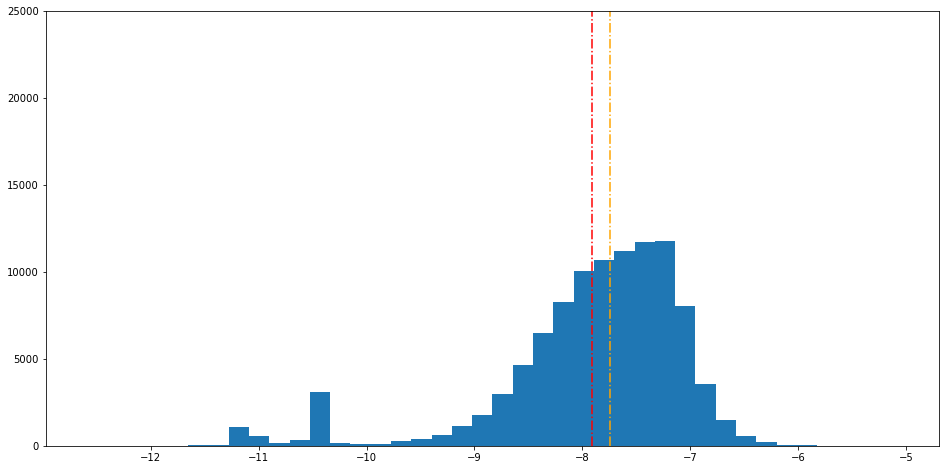

In [13]:
dist_mean = np.log10(df_bx['bx']).mean()
dist_median = np.log10(df_bx['bx']).median()

#Let´s plot bx along the track.
fig, ax0 = plt.subplots(nrows=1,figsize=(16,8))
plt.subplots_adjust(hspace=0.35)

ax0.hist(np.log10(df_bx['bx']),
         bins=40, #np.arange(200,1001,50),
         #density=True
         )
ax0.vlines(dist_mean, 0, 25000,
           color='red',
           linestyle='-.')
ax0.vlines(dist_median, 0, 25000,
           color='orange',
           linestyle='-.')
ax0.set_ylim(0,25000)
plt.show()

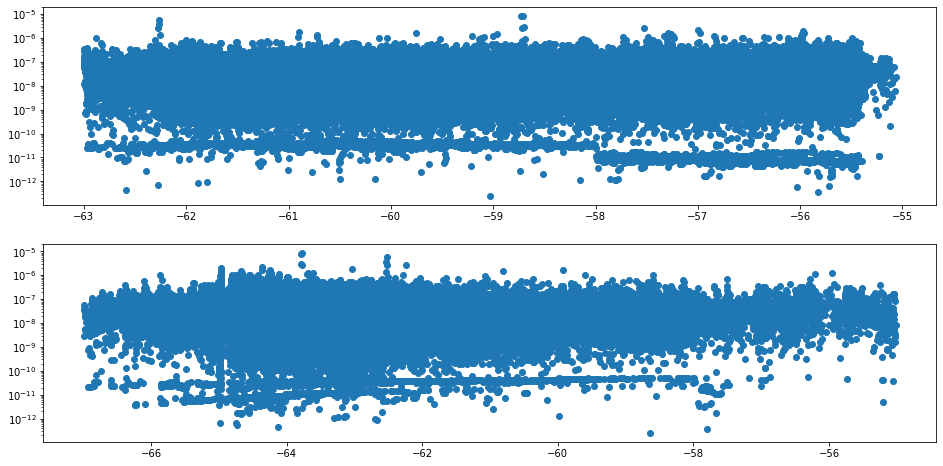

In [14]:
fig, (ax0, ax1) = plt.subplots(figsize=(16,8), nrows=2)
ax0.scatter(df_bx['lat'], df_bx['bx'])
ax1.scatter(df_bx['lon'], df_bx['bx'])
ax0.set_yscale('log')
ax1.set_yscale('log')

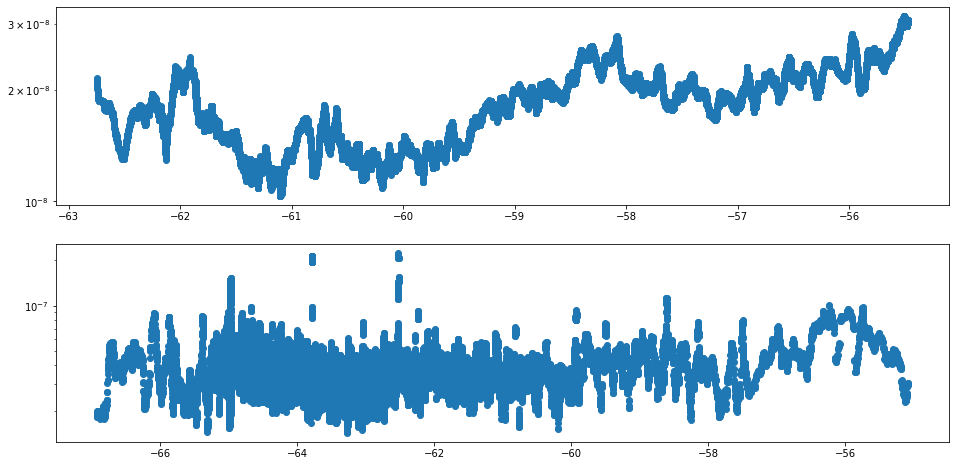

In [15]:
df_bx_rolling_lat = df_bx.sort_values('lat').rolling(1000).median()
df_bx_rolling_lon = df_bx.sort_values('lon').rolling(50).mean()


fig, (ax0, ax1) = plt.subplots(figsize=(16,8), nrows=2)
ax0.scatter(df_bx_rolling_lat['lat'], df_bx_rolling_lat['bx'])
ax1.scatter(df_bx_rolling_lon['lon'], df_bx_rolling_lon['bx'])
ax0.set_yscale('log')
ax1.set_yscale('log')

In [16]:
#xr.open_mfdataset('D:/GU/Thesis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D/2001/01/*.nc', parallel=True, engine='netcdf4')

In [17]:
ds_adt = xr.open_mfdataset(r'D:/GU/Thesis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/all_files/*', parallel=True, engine="netcdf4")

#Center longitude format to Atlantic.
ds_adt = ds_adt.assign_coords(longitude=(((ds_adt.longitude + 180) % 360)-180)).sortby('longitude')
ds_adt.longitude.attrs = {
    'long_name': 'Longitude',
    'standard_name': 'longitude',
    'units': 'degrees_east',
    'bounds': 'lon_bnds',
    'axis': 'X',
    'valid_max': 179.9375,
    'valid_min': -179.9375,
    '_CoordinateAxisType': 'Lon'}


KeyboardInterrupt: 

#Start year and end year
START_YEAR  = 2000
END_YEAR    = 2022 #NOT INCLUDED
NUMBER_YEAR = 21


years = range(START_YEAR, END_YEAR)
months = ['%.2d' % i for i in range(1,13)]
number_years = range(NUMBER_YEAR)

#Input paths of the files
base_adt_path = 'D:/GU/Thesis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D' #
#adt_file_name_base = 'dt_global_twosat_phy_l4_'


#Main file reading algorithm. Multifile reader of xarray which concanates the read files (loading through dask). Additional loop and concanating of each month and years (THIS IS JUST FOR THE FIRST YEAR, CHANGE INDEX OF YEARS (MAY HAVE TO LOOP THROUGH))
ds_adt = xr.concat([xr.concat([[xr.open_mfdataset(base_adt_path + '/' + str(i_year) + '/' + i_month + '/' + '*.nc', parallel = True, engine="netcdf4") for i_month in months] for i_year in years][n_year], dim='time') for n_year in number_years], dim='time')

#Center longitude format to Atlantic.
ds_adt = ds_adt.assign_coords(longitude=(((ds_adt.longitude + 180) % 360)-180)).sortby('longitude')
ds_adt.longitude.attrs = {
    'long_name': 'Longitude',
    'standard_name': 'longitude',
    'units': 'degrees_east',
    'bounds': 'lon_bnds',
    'axis': 'X',
    'valid_max': 179.9375,
    'valid_min': -179.9375,
    '_CoordinateAxisType': 'Lon'}

In [ ]:
ds_adt = ds_adt.drop_vars(['err_sla', 'err_ugosa', 'err_vgosa', 'flag_ice', 'tpa_correction', 'crs'])

In [ ]:
ds_adt

<xarray.Dataset>
Dimensions:    (time: 7885, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2021-08-02
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * nv         (nv) int32 0 1
Data variables:
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2000-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1999-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [ ]:
ds_adt = ds_adt.where(
    ds_adt['latitude'] < -54, drop=True).where(
        ds_adt['latitude'] > -63, drop=True).where(
            ds_adt['longitude'] < -51, drop=True).where(
                ds_adt['longitude'] > -76, drop=True
            )

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
c:\Users\gia

In [ ]:
ds_adt

,Array,Chunk
Bytes,216.57 MiB,28.12 kiB
Shape,"(7885, 36, 2, 100)","(1, 36, 2, 100)"
Count,94624 Tasks,7885 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,216.57 MiB,28.12 kiB
Shape,"(7885, 100, 2, 36)","(1, 100, 2, 36)"
Count,94624 Tasks,7885 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [ ]:
df_bx

,rho,lon,lat,time,bx
0,1027.111325,-55.036099,-60.186746,2008-04-02 12:37:59.443732,2.420470e-08
1,1027.112993,-55.050653,-60.181407,2008-04-02 12:42:02.501421,1.592764e-08
2,1027.113652,-55.065062,-60.175973,2008-04-02 12:46:09.843105,6.301471e-09
3,1027.114112,-55.079467,-60.170537,2008-04-02 12:50:17.165555,4.391614e-09
4,1027.114587,-55.094108,-60.165262,2008-04-02 12:54:28.593366,4.531314e-09
...,...,...,...,...,...
101663,1026.866556,-57.843450,-55.485430,2018-11-06 09:04:17.604416,3.159840e-12
101664,1026.857450,-57.911272,-55.501976,2018-11-06 09:30:52.863982,3.509134e-12
101665,1026.857449,-57.926199,-55.505041,2018-11-06 09:36:37.674582,4.413789e-12
101666,1026.927593,-57.993488,-55.509729,2018-11-06 21:50:48.685594,1.225301e-07


In [ ]:
ds_adt = ds_adt.drop_dims('nv')

In [ ]:
datetime = []
for i in df_bx['time']:
    datetime.append(np.datetime64(i))
df_bx['time'] = datetime

In [ ]:
ds_adt_interpolated = ds_adt.interp(time=('z', df_bx['time'].values), longitude=('z', df_bx['lon']), latitude= ('z', df_bx['lat']), method='linear')

In [ ]:
df_sla = ds_adt_interpolated['sla'].to_dataframe()

In [ ]:
df_adt = ds_adt_interpolated['adt'].to_dataframe()

In [ ]:
df_bx['sla'] = df_sla['sla']

In [ ]:
df_bx['adt'] = df_adt['adt']

In [ ]:
df_bx.to_csv(r'data/03_processed/SOCAT/data_gridded_SSH')

In [ ]:
df_bx_rolling = df_bx.sort_values('lat').rolling(100).median()
df_bx_rolling

,rho,lon,lat,bx,adt
16866,NaN,NaN,NaN,NaN,NaN
16926,NaN,NaN,NaN,NaN,NaN
16982,NaN,NaN,NaN,NaN,NaN
16902,NaN,NaN,NaN,NaN,NaN
16981,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
101189,1026.814843,-62.294217,-55.220464,3.041742e-08,-0.079400
101188,1026.814843,-62.358547,-55.217898,3.041742e-08,-0.079059
101187,1026.814488,-62.358547,-55.214792,2.964545e-08,-0.079059
101186,1026.814187,-62.358547,-55.214060,2.964545e-08,-0.079059


In [ ]:
df_90 = df_bx[df_bx['bx'] >= np.percentile(df_bx['bx'], 98)]

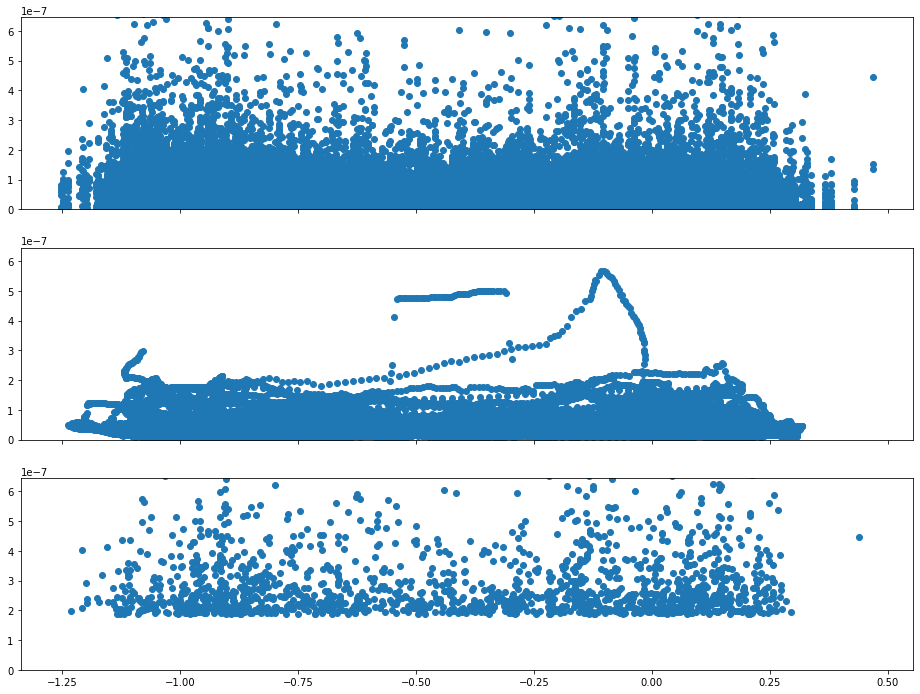

In [ ]:
df_bx_rolling = df_bx.rolling(50).mean()

fig, (ax0, ax1, ax2) = plt.subplots(figsize=(16,12), nrows=3, sharex=True)
ax0.scatter(df_bx['adt'], df_bx['bx'])
ax1.scatter(df_bx_rolling['adt'], df_bx_rolling['bx'])
ax2.scatter(df_90['adt'], df_90['bx'])
axes = [ax0, ax1, ax2]
for ax in axes:
    ax.set_ylim(0, np.percentile(df_bx['bx'],99.9))

In [ ]:
print(df_bx['lon'].min())
print(df_bx['lon'].max())
print(df_bx['lat'].min())
print(df_bx['lat'].max())

-66.99339848060261
-55.01778310497161
-62.99921002401914
-55.06774085532875


In [ ]:
df_bx[df_bx['adt'].isna()]

,rho,lon,lat,time,bx,adt
2599,1027.022967,-65.272674,-62.980045,2000-06-20 05:54:16.496082,7.248201e-09,NaN
2600,1027.023249,-65.272000,-62.971063,2000-06-20 05:57:04.153309,2.696569e-09,NaN
2601,1027.018331,-65.272000,-62.962070,2000-06-20 05:59:51.026676,4.697633e-08,NaN
2602,1027.028427,-65.272000,-62.953077,2000-06-20 06:03:34.900042,9.643114e-08,NaN
2603,1027.046016,-65.271183,-62.944098,2000-06-20 06:06:22.510856,1.680120e-07,NaN
...,...,...,...,...,...,...
80958,1027.340799,-64.993000,-62.919852,2017-08-30 11:24:50.319049,2.586850e-11,NaN
80959,1027.342763,-64.992952,-62.910859,2017-08-30 11:30:31.718403,1.876675e-08,NaN
80960,1027.348917,-64.992593,-62.901867,2017-08-30 11:36:17.462623,5.877810e-08,NaN
80961,1027.346970,-64.992121,-62.892877,2017-08-30 11:41:51.007435,1.859757e-08,NaN


In [5]:
x = df_bx.dropna(how='any')['adt']
y = df_bx.dropna(how='any')['bx']

fig, ax = plt.subplots(figsize = (16,8))
ax.hist2d(x, y, bins= 500)

KeyError: 'adt'